In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
socio_eco = pd.read_csv('../data/interim/socio_eco_interim.csv')

In [12]:
features = socio_eco.select_dtypes(include=['float64']).columns

# Panda profiling

In [13]:
profile = ProfileReport(socio_eco, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [14]:
profile.to_widgets()

# First informations

In [15]:
socio_eco[:10]

,EMPLOYMENT_VARIATION_RATE,IDX_CONSUMER_PRICE,IDX_CONSUMER_CONFIDENCE,NB_EMPLOYE,YEAR,MONTH,MONTH_YEAR,TRIMESTER
0,1.1,93.994,-36.400000,5191.0,2008,5,2008-05,8033
1,1.4,94.465,-41.800000,5228.1,2008,6,2008-06,8034
2,1.4,93.918,-42.700000,5228.1,2008,7,2008-07,8034
3,1.4,93.444,-36.100000,5228.1,2008,8,2008-08,8034
4,-0.1,93.621,-38.250000,5195.8,2008,9,2008-09,8035
5,-0.1,93.798,-40.400000,5195.8,2008,10,2008-10,8035
6,-0.1,93.200,-42.000000,5195.8,2008,11,2008-11,8035
7,-0.2,92.756,-45.900000,5176.3,2008,12,2008-12,8036
8,-0.2,92.785,-47.266667,5176.3,2009,1,2009-01,8036
9,-0.2,92.814,-48.633333,5176.3,2009,2,2009-02,8036


In [16]:
print(socio_eco.describe())

       EMPLOYMENT_VARIATION_RATE  IDX_CONSUMER_PRICE  IDX_CONSUMER_CONFIDENCE  \
count                  30.000000           30.000000                30.000000   
mean                   -1.386667           93.319467               -39.031667   
std                     1.519921            0.677983                 6.262453   
min                    -3.400000           92.201000               -50.000000   
25%                    -2.900000           92.792250               -42.525000   
50%                    -1.750000           93.175167               -39.050000   
75%                    -0.200000           93.907500               -34.300000   
max                     1.400000           94.601000               -26.900000   

        NB_EMPLOYE         YEAR      MONTH    TRIMESTER  
count    30.000000    30.000000  30.000000    30.000000  
mean   5085.620000  2009.066667   6.700000  8038.166667  
std      89.721832     0.784915   3.260527     2.960467  
min    4963.600000  2008.000000   1.00

In [17]:
print(socio_eco.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
EMPLOYMENT_VARIATION_RATE    30 non-null float64
IDX_CONSUMER_PRICE           30 non-null float64
IDX_CONSUMER_CONFIDENCE      30 non-null float64
NB_EMPLOYE                   30 non-null float64
YEAR                         30 non-null int64
MONTH                        30 non-null int64
MONTH_YEAR                   30 non-null object
TRIMESTER                    30 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 2.0+ KB
None


# Evolution

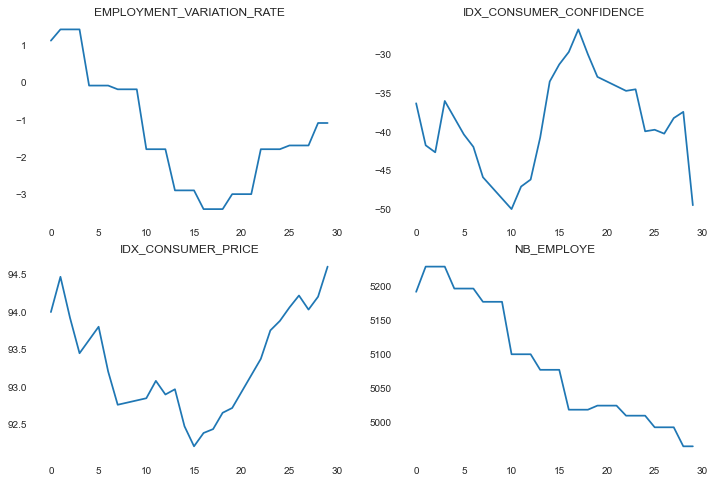

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
for k, feature in enumerate(features):
    ax = axs[k%2, k//2]
    ax.plot(socio_eco[feature])
    ax.set_title(feature)

# Correlations

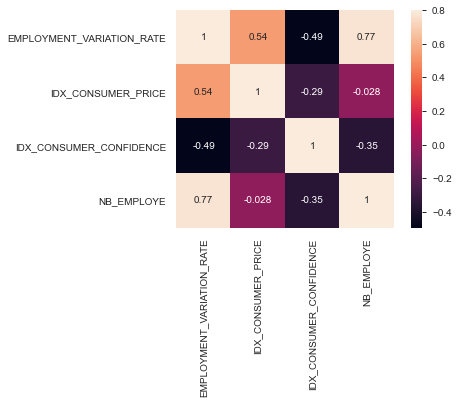

In [19]:
corrMatt = socio_eco[features].corr()
sns.heatmap(corrMatt,vmax=.8, square=True,annot=True)

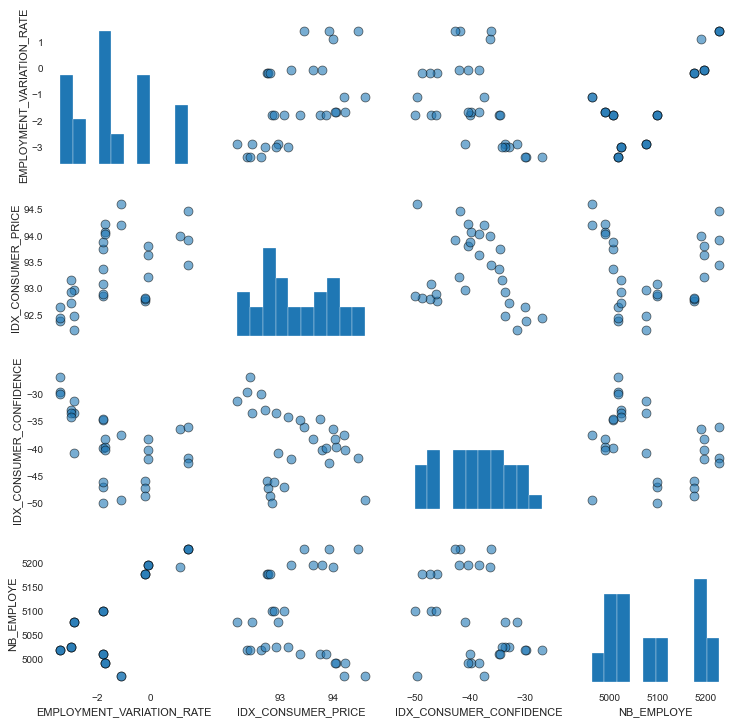

In [20]:
sns.pairplot(socio_eco[features], diag_kind="hist", plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})